In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("hk_n_clust_per_module.txt") as file:
    hk_lines = file.readlines()
    
with open("spccl_n_clust_per_module.txt") as file:
    spccl_lines = file.readlines()

In [4]:
hk_lines

['Running build/bin/traccc_seq_example_cuda tml_detector/trackml-detector.csv tml_pixels/ 1\n',
 'Starting CUDA clusterization.\n',
 'Number of modules: 3859\n',
 'TIME TAKEN FOR HK CLUSTERISATION: 0.311944s\n',
 'TIME TAKEN FOR LABEL NORMALISATION: 0.172872s\n',
 'After: 9 clusters in module 3840.\n',
 'After: 7 clusters in module 3841.\n',
 'After: 12 clusters in module 3842.\n',
 'After: 12 clusters in module 3843.\n',
 'After: 10 clusters in module 3844.\n',
 'After: 7 clusters in module 3845.\n',
 'After: 7 clusters in module 3846.\n',
 'After: 6 clusters in module 3847.\n',
 'After: 12 clusters in module 3848.\n',
 'After: 10 clusters in module 3849.\n',
 'After: 12 clusters in module 3850.\n',
 'After: 8 clusters in module 3851.\n',
 'After: 7 clusters in module 3852.\n',
 'After: 9 clusters in module 3853.\n',
 'After: 9 clusters in module 3854.\n',
 'After: 11 clusters in module 3855.\n',
 'After: 6 clusters in module 3856.\n',
 'After: 6 clusters in module 3857.\n',
 'After: 

In [10]:
hk_n_clusters = {}
spccl_n_clusters = {}
for line in hk_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        hk_n_clusters[module_num] = n_clusters
        
for line in spccl_lines:
    if ("clusters" in line):
        n_clusters_end = line.find("clusters") - 1
        n_clusters = int(line[7:n_clusters_end])
        
        module_start = line.find("module") + 7
        module_num = int(line[module_start:-2])
        
        spccl_n_clusters[module_num] = n_clusters

In [15]:
n_modules = len(list(hk_n_clusters.keys()))
print(n_modules == len(list(spccl_n_clusters.keys())))

True


In [20]:
n_mismatches = 0

for module in range(n_modules):
    num_clusters_hk = hk_n_clusters[module]
    num_clusters_spccl = spccl_n_clusters[module]
    
    if (num_clusters_hk != num_clusters_spccl):
        n_mismatches += 1
        print(f"Cluster mismatch found in module {module}.")
        print(f"HK: {num_clusters_hk} clusters found. Sparse CCL: {num_clusters_spccl} clusters found\n")

Cluster mismatch found in module 541.
HK: 31 clusters found. Sparse CCL: 30 clusters found

Cluster mismatch found in module 742.
HK: 27 clusters found. Sparse CCL: 18 clusters found

Cluster mismatch found in module 743.
HK: 26 clusters found. Sparse CCL: 19 clusters found

Cluster mismatch found in module 744.
HK: 28 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 745.
HK: 20 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 746.
HK: 21 clusters found. Sparse CCL: 14 clusters found

Cluster mismatch found in module 747.
HK: 13 clusters found. Sparse CCL: 9 clusters found

Cluster mismatch found in module 748.
HK: 9 clusters found. Sparse CCL: 7 clusters found

Cluster mismatch found in module 749.
HK: 33 clusters found. Sparse CCL: 20 clusters found

Cluster mismatch found in module 750.
HK: 22 clusters found. Sparse CCL: 16 clusters found

Cluster mismatch found in module 751.
HK: 24 clusters found. Sparse CCL: 16 cluster

In [21]:
print(n_mismatches)

557


In [25]:
hk_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
spccl_num_clusters_np = np.zeros(n_modules, dtype=np.int32)
for module in range(n_modules):
    hk_num_clusters_np[module] = hk_n_clusters[module]
    spccl_num_clusters_np[module] = spccl_n_clusters[module]

In [28]:
num_cluster_diffs = hk_num_clusters_np - spccl_num_clusters_np

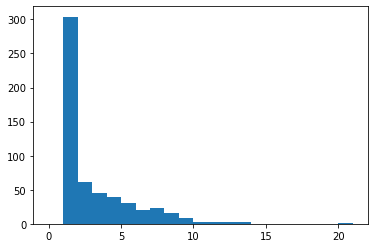

In [39]:
bin_edges = np.arange(22)
_, bins, _ = plt.hist(num_cluster_diffs[np.where(num_cluster_diffs)[0]], bins = bin_edges)
#plt.yscale("log")
plt.show()

In [38]:
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])